In [4]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-methodlines-heatBE)

Now we apply backward Euler to the heat equation. Mathematically this means multiplying by the *inverse* of a matrix, but we interpret that numerically as a linear system solution. We will reuse the setup from {numref}`Demo {number} <demo-methodlines-heatFE>`.

In [5]:
m = 100;  
[x, Dx, Dxx] = diffper(m, [0, 1]);
Ix = eye(m);
tfinal = 0.15;  n = 2400;  
tau = tfinal / n;  t = tau * (0:n)';
U = zeros(m, n+1);
U(:, 1) = exp( -60*(x - 0.5).^2 );

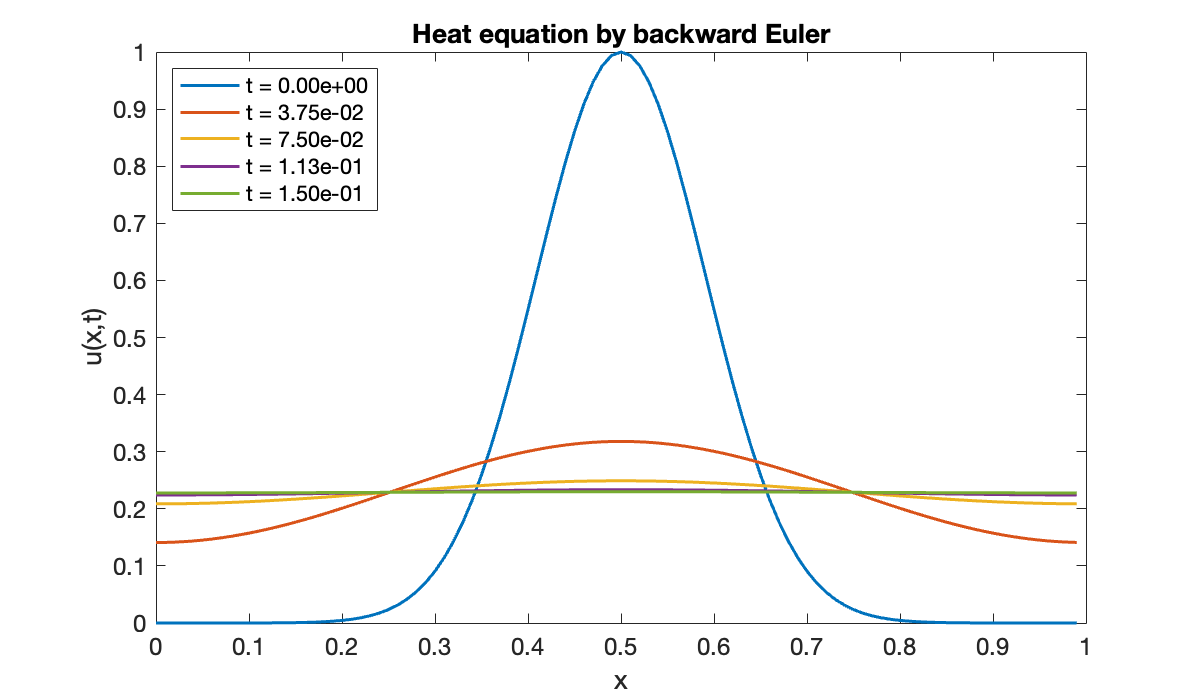

In [6]:
B = sparse(Ix - tau * Dxx);
[l, u] = lu(B);
for j = 1:n
    U(:, j+1) = u \ (l \ U(:, j));
end

index_times = 1:600:n+1;
show_times = t(index_times);
clf
for j = index_times
    str = sprintf("t = %.2e", t(j));
    plot(x, U(:, j), displayname=str) 
    hold on
end
legend(location="northwest")
xlabel('x'), ylabel('u(x,t)')
title('Heat equation by backward Euler')

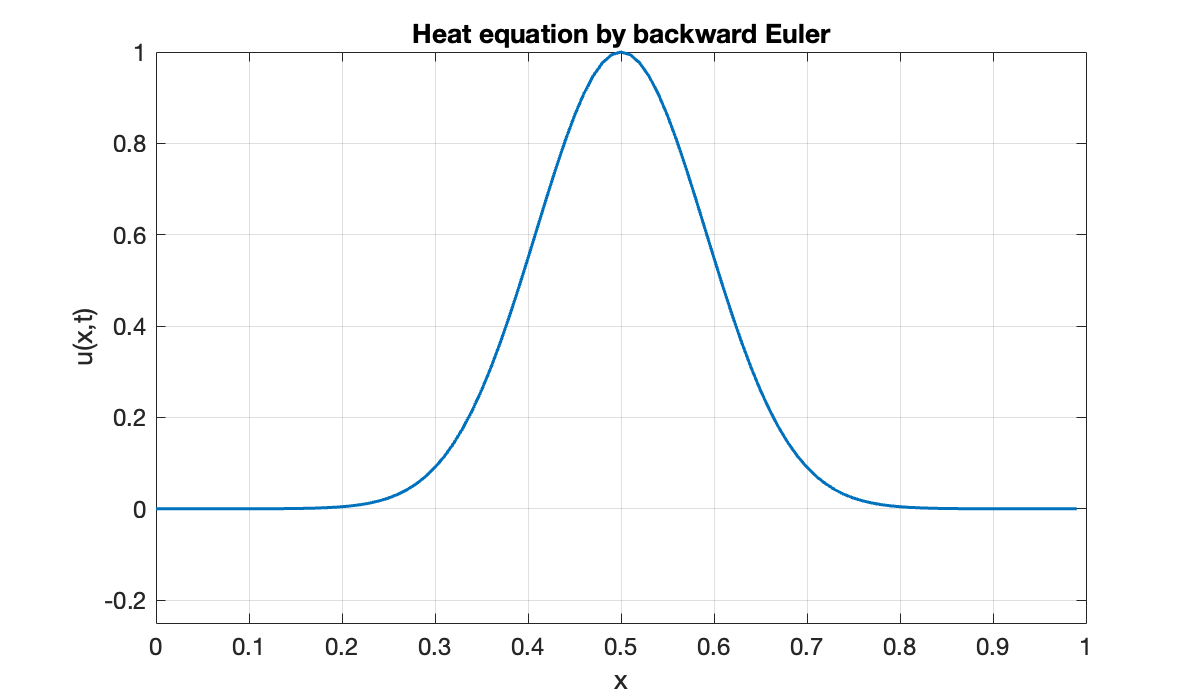

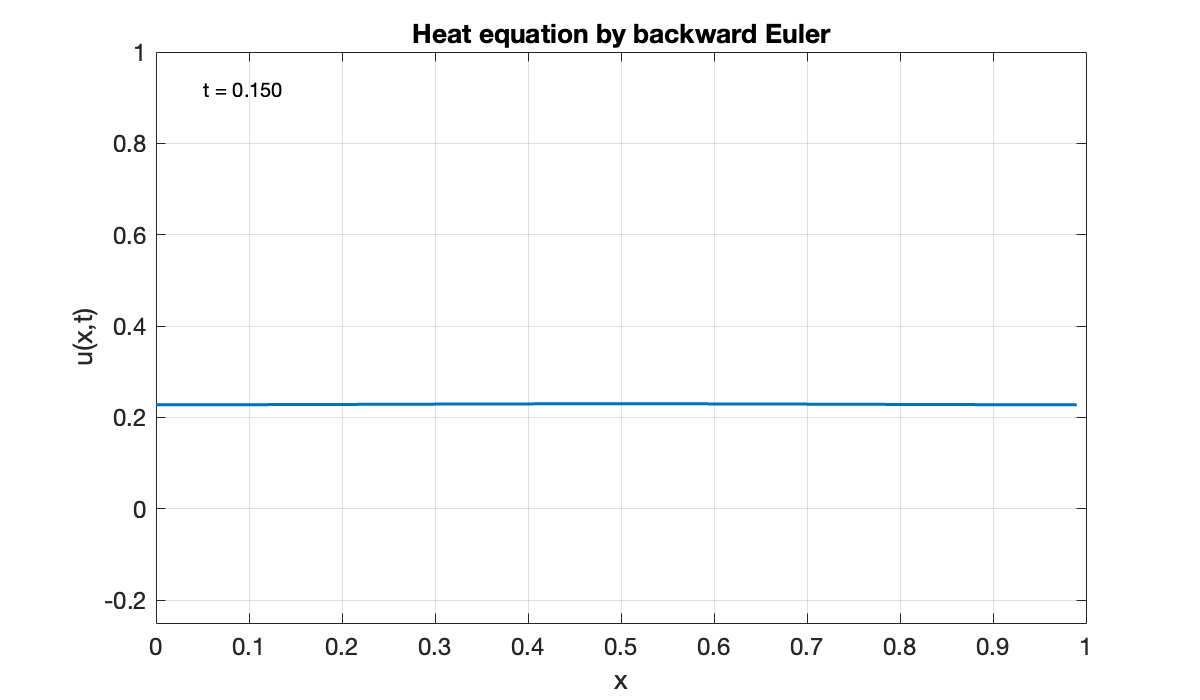

In [7]:
clf
index_times = 1:24:n+1;
plot(x, U(:, 1))
hold on,  grid on
axis([0, 1, -0.25, 1])
title('Heat equation by backward Euler') 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("figures/diffusionBE.mp4", "MPEG-4");
vid.Quality = 85;
open(vid);
for frame = index_times
    cla, plot(x, U(:, frame))
    str = sprintf("t = %.3f", t(frame));
    text(0.05, 0.92, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid) 

This solution looks physically plausible, as the large concentration in the center diffuses outward until the solution is essentially constant. Observe that the solution remains periodic in space for all time.